### Imports

In [309]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [310]:
ec = pd.read_excel('data/existing-customers.xlsx')
pc = pd.read_excel('data/potential-customers.xlsx')

C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### Investigating the data

In [311]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RowID           32561 non-null  object
 1   age             32561 non-null  int64 
 2   workclass       30725 non-null  object
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  class           32561 non-null  object
dtypes: int64(5), object(10)
memory usage: 3.7+ MB


In [312]:
# statistics
ec.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [313]:
# redundant column?
print(ec['education'].value_counts(normalize=True))
print(ec['education-num'].value_counts(normalize=True))

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64
9     0.322502
10    0.223918
13    0.164461
14    0.052916
11    0.042443
7     0.036086
12    0.032769
6     0.028654
4     0.019840
15    0.017690
5     0.015786
8     0.013298
16    0.012684
3     0.010227
2     0.005160
1     0.001566
Name: education-num, dtype: float64


In [314]:
# summary of categorical columns
categorical_columns = ec.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(f"Column: {col}")
    print("Unique values:", ec[col].nunique())
    print("Most frequent value:", ec[col].mode().iloc[0])
    print("Frequency of most frequent value:", ec[col].value_counts().iloc[0])
    print("\n" + "="*40 + "\n")

Column: RowID
Unique values: 32561
Most frequent value: Row0
Frequency of most frequent value: 1


Column: workclass
Unique values: 8
Most frequent value: Private
Frequency of most frequent value: 22696


Column: education
Unique values: 16
Most frequent value: HS-grad
Frequency of most frequent value: 10501


Column: marital-status
Unique values: 7
Most frequent value: Married-civ-spouse
Frequency of most frequent value: 14976


Column: occupation
Unique values: 14
Most frequent value: Prof-specialty
Frequency of most frequent value: 4140


Column: relationship
Unique values: 6
Most frequent value: Husband
Frequency of most frequent value: 13193


Column: race
Unique values: 5
Most frequent value: White
Frequency of most frequent value: 27816


Column: sex
Unique values: 2
Most frequent value: Male
Frequency of most frequent value: 21790


Column: native-country
Unique values: 41
Most frequent value: United-States
Frequency of most frequent value: 29170


Column: class
Unique values: 

In [315]:
# which columns have missing values
ec.isna().sum()

RowID                0
age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

## Data preprocessing

In [316]:
# remove redundant column
ec = ec.drop('education', axis=1)
ec = ec.drop('RowID', axis=1)
pc = pc.drop('education', axis=1)
pc = pc.drop('RowID', axis=1)
print("ec shape\t", pc.shape)
print("pc shape\t", ec.shape)

ec shape	 (16281, 12)
pc shape	 (32561, 13)


In [317]:
ec.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [318]:
# one hot encoding
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
ec_encoded = pd.get_dummies(ec, columns=categorical_columns)
pc_encoded = pd.get_dummies(pc, columns=categorical_columns)
print("ec shape\t", ec_encoded.shape)
print("pc shape\t", pc_encoded.shape)

ec shape	 (32561, 89)
pc shape	 (16281, 87)


In [319]:
# which columns are in ec_encoded but not in pc_encoded?
diff = set(ec_encoded.columns) - set(pc_encoded.columns)
print("diff:", diff)

diff: {'class', 'native-country_Holand-Netherlands'}


In [320]:
# Put the dutch back in
pc_encoded['native-country_Holand-Netherlands'] = 0
ec_temp =  ec_encoded.drop('class', axis=1)
column_order =ec_temp.columns
pc_encoded = pc_encoded[column_order]

diff = set(ec_encoded.columns) - set(pc_encoded.columns)
print("diff:", diff)

diff: {'class'}


In [321]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X = ec_encoded.drop('class', axis=1)
y = ec_encoded['class']
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=0)
X_train_concat = pd.concat([X_train, X_val], axis=0)
y_train_concat = np.concatenate([y_train, y_val])

print("X_train shape:\t", X_train.shape)
print("y_train shape:\t", y_train.shape)
print("X_val shape:\t", X_val.shape)
print("y_val shape:\t", y_val.shape)
print("X_test shape:\t", X_test.shape)
print("y_test shape:\t", y_test.shape)

X_train shape:	 (17452, 88)
y_train shape:	 (17452,)
X_val shape:	 (4363, 88)
y_val shape:	 (4363,)
X_test shape:	 (10746, 88)
y_test shape:	 (10746,)


## Training

### Let's try the decision tree classifier

In [322]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)


In [323]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred)
print("Accuracy:\t", accuracy_score(y_test, y_pred))
print("precision:\t", precision)
print("Recall:\t\t", recall_score(y_test, y_pred))



Accuracy:	 0.8203052298529685
precision:	 0.6312252964426878
Recall:		 0.6154142581888247


In [286]:
def calculate_expected_return(classifier, encoded_data, label_encoder, P):
    pred = classifier.predict(encoded_data)
    pred = label_encoder.inverse_transform(pred)
    list_of_people = [i for i in range(pred.size) if pred[i] == '>50K']
    count = len(list_of_people)
    expected_return = (P*count*0.1*980) + ((1-P)*count*0.05*(-310)) - 10*count
    return expected_return, list_of_people
print("Expected return:", calculate_expected_return(clf,pc_encoded,le,precision)[0])

Expected return: 173891.35412554283


[Text(0.5221641097231532, 0.9891304347826086, 'x[15] <= 0.5\ngini = 0.366\nsamples = 17452\nvalue = [13247, 4205]'),
 Text(0.23467901980337194, 0.967391304347826, 'x[2] <= 7073.5\ngini = 0.123\nsamples = 9360\nvalue = [8745, 615]'),
 Text(0.20579444405558764, 0.9456521739130435, 'x[1] <= 13.5\ngini = 0.094\nsamples = 9196\nvalue = [8740, 456]'),
 Text(0.1733910283573114, 0.9239130434782609, 'x[3] <= 2218.5\ngini = 0.072\nsamples = 8696\nvalue = [8369, 327]'),
 Text(0.12942158969514547, 0.9021739130434783, 'x[4] <= 42.5\ngini = 0.067\nsamples = 8647\nvalue = [8348, 299]'),
 Text(0.08314458894423747, 0.8804347826086957, 'x[39] <= 0.5\ngini = 0.037\nsamples = 7001\nvalue = [6868, 133]'),
 Text(0.058583200631512906, 0.8586956521739131, 'x[0] <= 38.5\ngini = 0.036\nsamples = 6993\nvalue = [6864, 129]'),
 Text(0.022465374932776318, 0.8369565217391305, 'x[29] <= 0.5\ngini = 0.015\nsamples = 4807\nvalue = [4770, 37]'),
 Text(0.00976399616532739, 0.8152173913043478, 'x[0] <= 26.5\ngini = 0.01\n

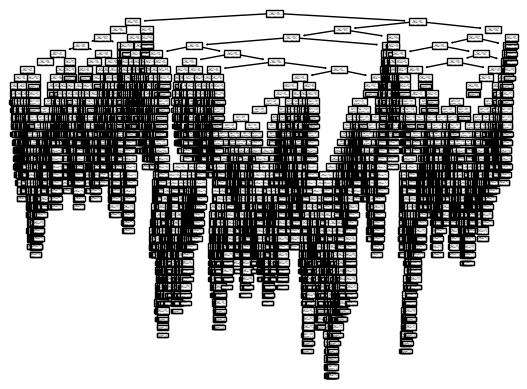

In [287]:
# plot the tree
from sklearn import tree
tree.plot_tree(clf)

#### Handling overfitting with post pruning 

In [324]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [325]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

#### Let's try maximizing the precision first

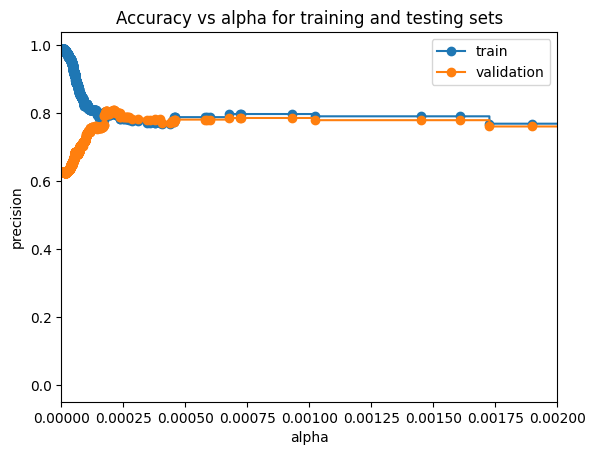

In [326]:
train_scores = [precision_score(y_train, clf_i.predict(X_train), zero_division=0) for clf_i in clfs]
val_scores = [precision_score(y_val, clf_i.predict(X_val), zero_division=0) for clf_i in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("precision")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.xlim(0.0, 0.002)
plt.show()

In [327]:
# max alpha in for test set
max_alpha_index = val_scores.index(max(val_scores))
max_alpha = ccp_alphas[max_alpha_index]
max_alpha

0.0002088071691430278

In [328]:
print("X_train shape:\t", X_train_concat.shape)
print("y_train shape:\t", y_train_concat.shape)

X_train shape:	 (21815, 88)
y_train shape:	 (21815,)


In [329]:
clf = DecisionTreeClassifier(random_state=0,ccp_alpha=max_alpha)
clf.fit(X_train_concat, y_train_concat)
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred)
print("Accuracy:\t", accuracy_score(y_test, y_pred))
print("precision:\t", precision)
print("Recall:\t\t", recall_score(y_test, y_pred))

Accuracy:	 0.8598548297040759
precision:	 0.751501154734411
Recall:		 0.6269749518304432


[Text(0.4507378472222222, 0.9736842105263158, 'x[15] <= 0.5\ngini = 0.365\nsamples = 21815\nvalue = [16569, 5246]'),
 Text(0.2387152777777778, 0.9210526315789473, 'x[2] <= 7073.5\ngini = 0.12\nsamples = 11729\nvalue = [10978, 751]'),
 Text(0.1857638888888889, 0.868421052631579, 'x[1] <= 13.5\ngini = 0.092\nsamples = 11524\nvalue = [10970, 554]'),
 Text(0.12152777777777778, 0.8157894736842105, 'x[3] <= 2218.5\ngini = 0.07\nsamples = 10921\nvalue = [10522, 399]'),
 Text(0.0763888888888889, 0.7631578947368421, 'x[4] <= 40.5\ngini = 0.065\nsamples = 10861\nvalue = [10495, 366]'),
 Text(0.027777777777777776, 0.7105263157894737, 'x[0] <= 34.5\ngini = 0.036\nsamples = 8690\nvalue = [8532, 158]'),
 Text(0.013888888888888888, 0.6578947368421053, 'gini = 0.011\nsamples = 5333\nvalue = [5304, 29]'),
 Text(0.041666666666666664, 0.6578947368421053, 'x[29] <= 0.5\ngini = 0.074\nsamples = 3357\nvalue = [3228, 129]'),
 Text(0.027777777777777776, 0.6052631578947368, 'gini = 0.059\nsamples = 3075\nvalue

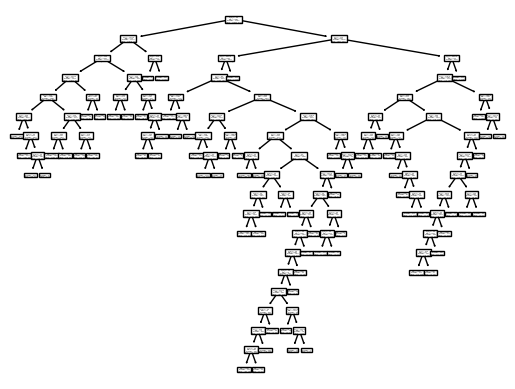

In [294]:
tree.plot_tree(clf)

In [330]:

expected_return, list_of_people = calculate_expected_return(clf,pc_encoded,le, precision)
print("Expected return: ", expected_return)

Expected return:  190687.4702078522


#### Maximize recall

In [331]:
train_scores = [recall_score(y_train, clf_i.predict(X_train), zero_division=0) for clf_i in clfs]
val_scores = [recall_score(y_val, clf_i.predict(X_val), zero_division=0) for clf_i in clfs]


In [332]:
max_alpha_index = val_scores.index(max(val_scores))
max_alpha = ccp_alphas[max_alpha_index]

clf = DecisionTreeClassifier(random_state=0,ccp_alpha=max_alpha)
clf.fit(X_train_concat, y_train_concat)
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred)
print("Accuracy:\t", accuracy_score(y_test, y_pred))
print("precision:\t", precision)
print("Recall:\t\t", recall_score(y_test, y_pred))

Accuracy:	 0.8549227619579378
precision:	 0.7236614853195165
Recall:		 0.6458574181117533


In [333]:
expected_return, list_of_people = calculate_expected_return(clf,pc_encoded,le,precision)
print("Expected return: ", expected_return)

Expected return:  192447.6960276339


In [299]:
with open('predicted_customers.txt', 'w') as file:
    for i in list_of_people:
        file.write('Row'+str(i) + '\n')

#### Maximize accuracy score

In [300]:
train_scores = [clf_i.score(X_train, y_train) for clf_i in clfs]
val_scores = [clf_i.score(X_test, y_test) for clf_i in clfs]

In [301]:
max_alpha_index = val_scores.index(max(val_scores))
max_alpha = ccp_alphas[max_alpha_index]

clf = DecisionTreeClassifier(random_state=0,ccp_alpha=max_alpha)
clf.fit(X_train_concat, y_train_concat)
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred)
print("Accuracy:\t\t", accuracy_score(y_test, y_pred))
print("precision:\t\t", precision)
print("Recall:\t\t\t", recall_score(y_test, y_pred))

expected_return, list_of_people = calculate_expected_return(clf,pc_encoded,le,precision)
print("Expected return:\t", expected_return)

Accuracy:		 0.8599478875860785
precision:		 0.7518484288354899
Recall:			 0.6269749518304432
Expected return:	 191351.67975970428


### A random forest of trees

In [302]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_concat, y_train_concat)
y_pred = rf.predict(X_test)
precision = precision_score(y_test, y_pred)
expected_return, list_of_people = calculate_expected_return(rf,pc_encoded,le,precision)

In [303]:
print("Accuracy:\t\t", accuracy_score(y_test, y_pred))
print("precision:\t\t", precision)
print("Recall:\t\t\t", recall_score(y_test, y_pred))
print("Expected return:\t", expected_return)


Accuracy:		 0.8479434208077424
precision:		 0.712704736609119
Recall:			 0.6204238921001927
Expected return:	 183181.3030101815


In [304]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 10, 30],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False],
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train_concat, y_train_concat)
best_params = grid_search.best_params_
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train_concat, y_train_concat)
y_pred = best_rf.predict(X_test)

In [305]:
precision = precision_score(y_test, y_pred)
expected_return = calculate_expected_return(best_rf,pc_encoded,le,precision)

In [306]:
print("Accuracy:\t\t", accuracy_score(y_test, y_pred))
print("precision:\t\t", precision)
print("Recall:\t\t\t", recall_score(y_test, y_pred))
print("Expected return:\t", expected_return)


Accuracy:		 0.8619021031081333
precision:		 0.759458197104157
Recall:			 0.6265895953757226
Expected return:	 (189925.62330686595, [3, 7, 10, 11, 14, 15, 17, 19, 20, 25, 30, 36, 40, 41, 53, 57, 58, 66, 70, 71, 83, 87, 89, 92, 98, 126, 129, 133, 140, 142, 143, 148, 154, 164, 170, 178, 179, 181, 190, 197, 200, 201, 205, 208, 220, 224, 226, 231, 249, 260, 278, 284, 290, 298, 308, 310, 313, 318, 321, 329, 334, 343, 344, 346, 347, 354, 355, 357, 364, 365, 366, 368, 373, 375, 376, 382, 388, 389, 396, 398, 399, 409, 418, 430, 435, 439, 445, 452, 457, 462, 466, 480, 483, 495, 502, 507, 518, 524, 526, 529, 535, 537, 544, 546, 552, 553, 554, 557, 558, 562, 568, 570, 574, 575, 578, 581, 582, 594, 597, 600, 611, 619, 625, 627, 635, 638, 642, 643, 652, 656, 660, 673, 679, 683, 692, 698, 699, 701, 702, 709, 711, 714, 718, 719, 721, 726, 732, 748, 750, 755, 758, 776, 781, 785, 786, 797, 807, 815, 824, 828, 829, 843, 846, 848, 851, 857, 858, 866, 868, 878, 882, 884, 887, 897, 900, 901, 905, 914, 920, 

### Ada boost

In [307]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
ada.fit(X_train_concat, y_train_concat)
y_pred = rf.predict(X_test)
precision = precision_score(y_test, y_pred)
expected_return, list_of_people = calculate_expected_return(ada,pc_encoded,le,precision)

In [308]:
print("Accuracy:\t\t", accuracy_score(y_test, y_pred))
print("precision:\t\t", precision)
print("Recall:\t\t\t", recall_score(y_test, y_pred))
print("Expected return:\t", expected_return)

Accuracy:		 0.8479434208077424
precision:		 0.712704736609119
Recall:			 0.6204238921001927
Expected return:	 180854.83953076586
